# Anomaly Detection

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('iot_telemetry_data.csv')
df.head()

C:\Users\willi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ts        405184 non-null  float64
 1   device    405184 non-null  object 
 2   co        405184 non-null  float64
 3   humidity  405184 non-null  float64
 4   light     405184 non-null  bool   
 5   lpg       405184 non-null  float64
 6   motion    405184 non-null  bool   
 7   smoke     405184 non-null  float64
 8   temp      405184 non-null  float64
dtypes: bool(2), float64(6), object(1)
memory usage: 22.4+ MB


In [3]:
df.dtypes

ts          float64
device       object
co          float64
humidity    float64
light          bool
lpg         float64
motion         bool
smoke       float64
temp        float64
dtype: object

# Changing boolean values to integers for the models 

In [4]:
df['light_enc'] = df['light'].astype(int)

In [5]:
df['motion_enc'] = df['motion'].astype(int)

In [6]:
df.device.value_counts()

b8:27:eb:bf:9d:51    187451
00:0f:00:70:91:0a    111815
1c:bf:ce:15:ec:4d    105918
Name: device, dtype: int64

# Changing the 3 unique targets to 0, 1 and 2

In [7]:
df['target'] = df['device'].map({'b8:27:eb:bf:9d:51': 0, '00:0f:00:70:91:0a': 1, '1c:bf:ce:15:ec:4d': 2})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ts          405184 non-null  float64
 1   device      405184 non-null  object 
 2   co          405184 non-null  float64
 3   humidity    405184 non-null  float64
 4   light       405184 non-null  bool   
 5   lpg         405184 non-null  float64
 6   motion      405184 non-null  bool   
 7   smoke       405184 non-null  float64
 8   temp        405184 non-null  float64
 9   light_enc   405184 non-null  int32  
 10  motion_enc  405184 non-null  int32  
 11  target      405184 non-null  int64  
dtypes: bool(2), float64(6), int32(2), int64(1), object(1)
memory usage: 28.6+ MB


In [9]:
df_model = df[['co', 'humidity', 'lpg','smoke','temp', 'light_enc', 'motion_enc','target']]

# It looks like co, lpg and smoke are on the same scale and humidity and temperature come from another.

<AxesSubplot:>

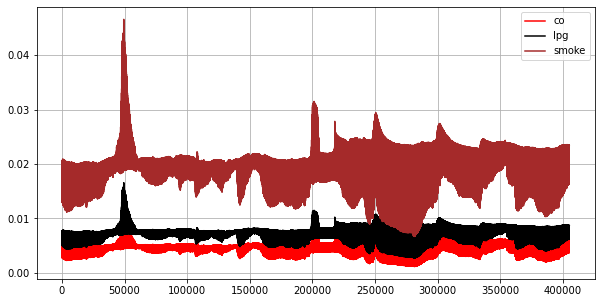

In [11]:
df['co'].plot(color='red',figsize=(10,5),grid=True,legend=True)
df['lpg'].plot(color='black', figsize=(10,5),grid=True,legend=True)
df['smoke'].plot(color='brown',figsize=(10,5),grid=True,legend=True)

<AxesSubplot:>

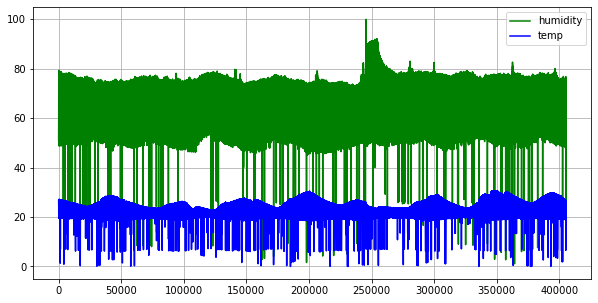

In [12]:
df['humidity'].plot(color='green', figsize=(10,5),grid=True,legend=True)
df['temp'].plot(color='blue',figsize=(10,5),grid=True, legend=True)

<AxesSubplot:ylabel='Density'>

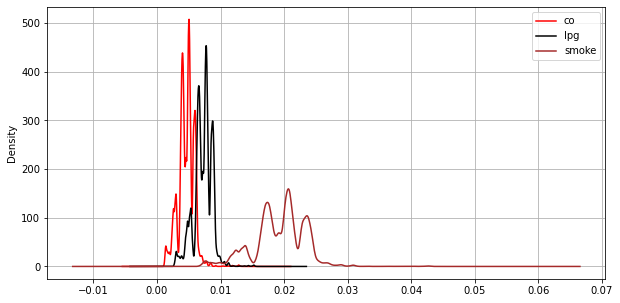

In [13]:
df['co'].plot(kind='kde', color='red', figsize=(10,5),grid=True,legend=True)
df['lpg'].plot(kind='kde', color='black', figsize=(10,5),grid=True,legend=True)
df['smoke'].plot(kind='kde',color='brown',figsize=(10,5),grid=True,legend=True)

<AxesSubplot:ylabel='Density'>

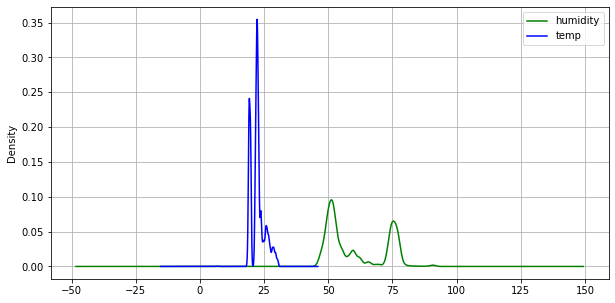

In [14]:
df['humidity'].plot(kind='kde',color='green', figsize=(10,5),grid=True,legend=True)
df['temp'].plot(kind='kde', color='blue',figsize=(10,5),grid=True, legend=True)

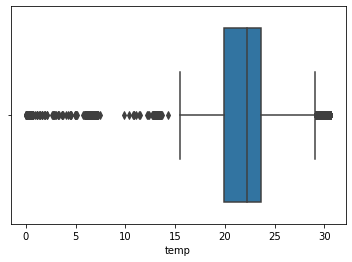

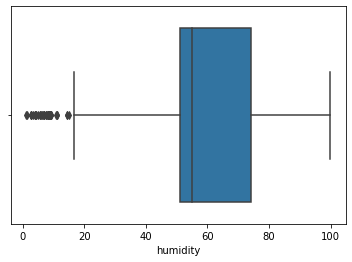

In [15]:
#I think the temperature might have been recorded in celcius
sns.boxplot(df_model['temp'])
plt.show()
sns.boxplot(df_model['humidity'])
plt.show()

In [15]:
df_model.describe()

,co,humidity,lpg,smoke,temp,light_enc,motion_enc,target
count,405184.000000,405184.000000,405184.000000,405184.000000,405184.000000,405184.000000,405184.00000,405184.000000
mean,0.004639,60.511694,0.007237,0.019264,22.453987,0.277718,0.00119,0.798775
std,0.001250,11.366489,0.001444,0.004086,2.698347,0.447874,0.03447,0.826770
min,0.001171,1.100000,0.002693,0.006692,0.000000,0.000000,0.00000,0.000000
25%,0.003919,51.000000,0.006456,0.017024,19.900000,0.000000,0.00000,0.000000
50%,0.004812,54.900000,0.007489,0.019950,22.200000,0.000000,0.00000,1.000000
75%,0.005409,74.300003,0.008150,0.021838,23.600000,1.000000,0.00000,2.000000
max,0.014420,99.900002,0.016567,0.046590,30.600000,1.000000,1.00000,2.000000


<AxesSubplot:xlabel='humidity', ylabel='temp'>

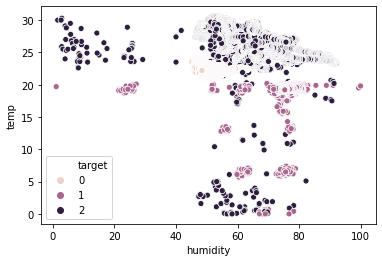

In [16]:
sns.scatterplot('humidity', 'temp', data=df_model, hue='target')

<AxesSubplot:xlabel='co', ylabel='lpg'>

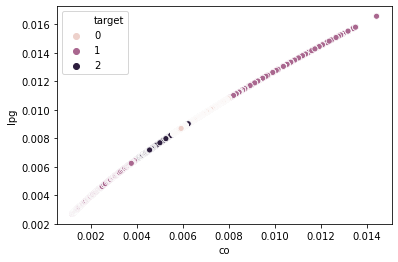

In [17]:
sns.scatterplot('co', 'lpg', data=df_model, hue='target')

## Classification - can all these features predict what device the data came from?

In [27]:
X = df_model.drop('target', axis=1)
y = df_model['target']

In [28]:
print(df['device'].value_counts())
print(df_model['target'].value_counts())

b8:27:eb:bf:9d:51    187451
00:0f:00:70:91:0a    111815
1c:bf:ce:15:ec:4d    105918
Name: device, dtype: int64
0    187451
1    111815
2    105918
Name: target, dtype: int64


In [29]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.80, random_state=42)

In [30]:
#Scaling data to improve computing time
#Normalizes each feature to normal distribution - mu=0 and sigma = 1
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True)
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [31]:
#Fitting data to a logistic regression model
#Logistic regression is a classification model
#I used class_weight='balanced' to balance out the 3 seprate classes
#When I added class_weight='balanced', my precision imporved
#With 'ovr' - onevsrest - a binary problem is fit for each class
#'saga' is used for larger datasets and can handle no penalty and multinominal loss(cross-entropy)
#Cross-entropy increases as the predicted probability moves away from actual label
#Cross-entropy calculates total entropy between the probability distributions(difference between the two distributions)
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(class_weight='balanced', random_state=0, solver='saga', multi_class='ovr' )

In [32]:
logR.fit(X_train,y_train)

C:\Users\willi\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\willi\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\willi\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(class_weight='balanced', multi_class='ovr', random_state=0,
                   solver='saga')

In [33]:
preds = logR.predict(X_test)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    149966
           1       1.00      1.00      1.00     89527
           2       0.99      1.00      1.00     84655

    accuracy                           1.00    324148
   macro avg       1.00      1.00      1.00    324148
weighted avg       1.00      1.00      1.00    324148



# I tried 4 different test sizes(90, 60, 20, 10, 80 test sizes) and two achieved 100% precision in classifying all 3 devices and two achieved 100% for the first 2 and 99% for the last device. I suspect that's because the last device has less data than the other 2.

## Regression - Can humidity, lpg, smoke, light , motion and temperature predict the levels of CO2?

<AxesSubplot:>

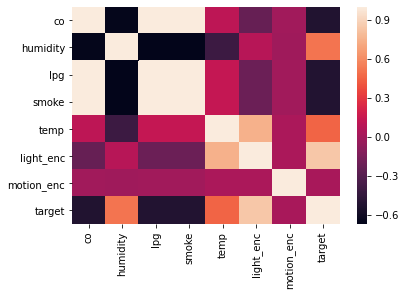

In [35]:
sns.heatmap(df_model.corr())

In [38]:
X2 = df_model.drop(['co','target'],axis=1)
y2 = df_model.co

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [54]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.80, random_state=42)

In [55]:
X2_train = ss.fit_transform(X2_train)
X2_test = ss.fit_transform(X2_test)

In [56]:
lr.fit(X2_train, y2_train)

LinearRegression()

In [57]:
regression_preds = lr.predict(X2_test)

In [58]:
sklearn.metrics.r2_score(y2_test, regression_preds)

0.9999542995826372

# Clustering

In [59]:
df_model.head()

,co,humidity,lpg,smoke,temp,light_enc,motion_enc,target
0,0.004956,51.000000,0.007651,0.020411,22.700000,0,0,0
1,0.002840,76.000000,0.005114,0.013275,19.700001,0,0,1
2,0.004976,50.900000,0.007673,0.020475,22.600000,0,0,0
3,0.004403,76.800003,0.007023,0.018628,27.000000,1,0,2
4,0.004967,50.900000,0.007664,0.020448,22.600000,0,0,0


In [60]:
df_cluster = df_model[['co', 'humidity', 'lpg', 'smoke','temp']]

In [61]:
from sklearn.cluster import KMeans

In [62]:
#Assigns data points to the closest centroid using the Euclidean distance
#Euclidean distance - sqrt(x - a)^2 + (y-b)^2
#n_init - Number of time the k-means algorithm will be run with different centroid seeds.
#max_iter - Maximum number of iterations of the k-means algorithm for a single run
km = KMeans(n_init=300, max_iter =200)
preds = km.fit_predict(df_cluster)
df_cluster['preds'] = preds

C:\Users\willi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [63]:
df_cluster.head()

,co,humidity,lpg,smoke,temp,preds
0,0.004956,51.000000,0.007651,0.020411,22.700000,0
1,0.002840,76.000000,0.005114,0.013275,19.700001,1
2,0.004976,50.900000,0.007673,0.020475,22.600000,0
3,0.004403,76.800003,0.007023,0.018628,27.000000,6
4,0.004967,50.900000,0.007664,0.020448,22.600000,0


In [64]:
df_cluster.describe()

,co,humidity,lpg,smoke,temp,preds
count,405184.000000,405184.000000,405184.000000,405184.000000,405184.000000,405184.000000
mean,0.004639,60.511694,0.007237,0.019264,22.453987,1.951691
std,0.001250,11.366489,0.001444,0.004086,2.698347,1.893555
min,0.001171,1.100000,0.002693,0.006692,0.000000,0.000000
25%,0.003919,51.000000,0.006456,0.017024,19.900000,0.000000
50%,0.004812,54.900000,0.007489,0.019950,22.200000,1.000000
75%,0.005409,74.300003,0.008150,0.021838,23.600000,3.000000
max,0.014420,99.900002,0.016567,0.046590,30.600000,7.000000


In [68]:
cluster1 = df_cluster[df_cluster['preds'] == 1]
cluster2 = df_cluster[df_cluster['preds'] == 2]
cluster3 = df_cluster[df_cluster['preds'] == 3]
cluster4 = df_cluster[df_cluster['preds'] == 4]
cluster5 = df_cluster[df_cluster['preds'] == 5]
cluster6 = df_cluster[df_cluster['preds'] == 6]
cluster7 = df_cluster[df_cluster['preds'] == 7]

In [80]:
print('Cluster1',cluster1.describe())
print('Cluster2',cluster2.describe())
print('Cluster3',cluster3.describe())
print('Cluster4',cluster4.describe())
print('Cluster5',cluster5.describe())
print('Cluster6',cluster6.describe())
print('Cluster7',cluster7.describe())

Cluster1                   co       humidity            lpg          smoke  \
count  111659.000000  111659.000000  111659.000000  111659.000000   
mean        0.003527      75.487576       0.005894       0.015490   
std         0.001479       1.458842       0.001700       0.004809   
min         0.001171      61.700001       0.002693       0.006692   
25%         0.002613      74.400002       0.004815       0.012445   
50%         0.003230      75.400002       0.005613       0.014662   
75%         0.004116      76.500000       0.006689       0.017682   
max         0.014420      82.699997       0.016567       0.046590   

                temp     preds  
count  111659.000000  111659.0  
mean       19.363198       1.0  
std         0.655995       0.0  
min         0.000000       1.0  
25%        19.100000       1.0  
50%        19.400000       1.0  
75%        19.700001       1.0  
max        22.700001       1.0  
Cluster2                  co      humidity           lpg         smoke  

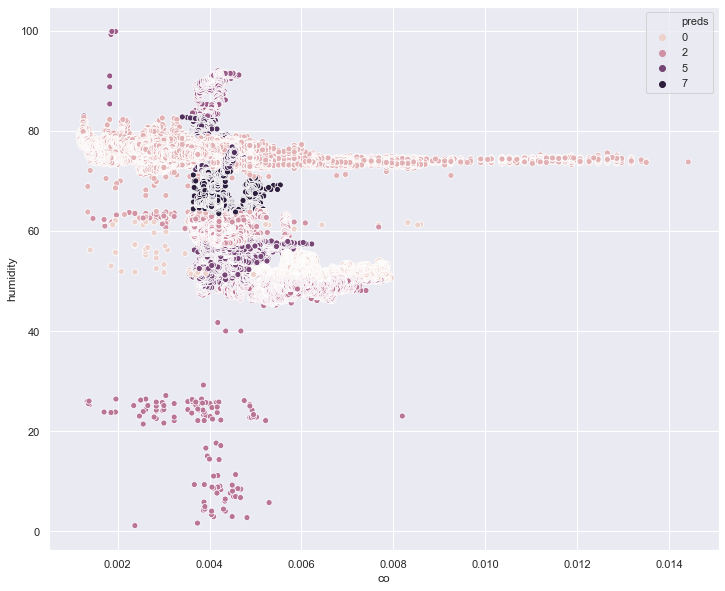

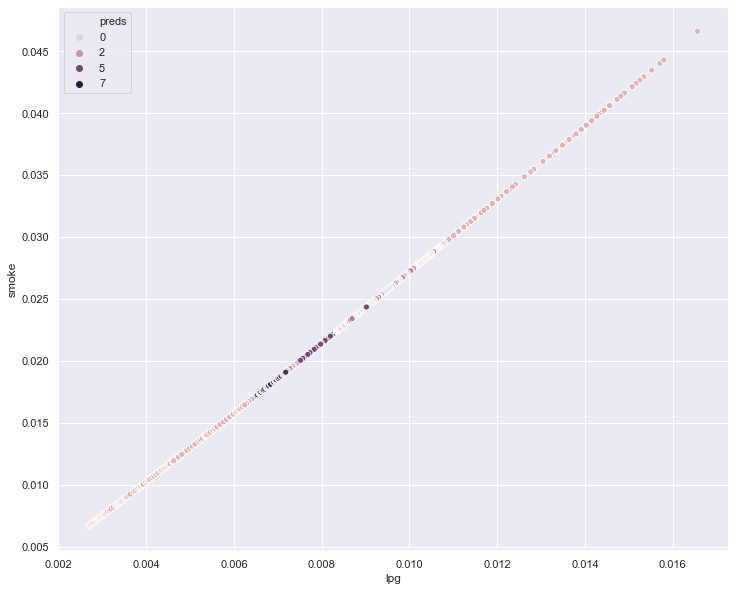

In [72]:
sns.set(rc={'figure.figsize':(12,10)})
sns.scatterplot('co', 'humidity', hue=df_cluster['preds'], data=df_cluster)
plt.show()
sns.scatterplot('lpg', 'smoke', hue=df_cluster['preds'], data=df_cluster)
plt.show()

## I let you guys draw your own conclusions from the cluster measurements.

# I think anomaly detection is a useful way to prevent costly mistakes or illegal activity.  Even though this is IoT data, this would be useful for tracking animals movements, movements of shipping, financial data, network traffic, even tracking fishing vessels to investigate and mitigate illegal fishing and finning operations.